In [1]:
import pandas as pd
import seaborn as sns
import sys
import platform
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
# Setup your Jupiter notebook in your systems and test if Python is running. 
print(platform.python_version())

3.11.5


In [3]:
# Plot histograms of the continuous variables (box, budget, starpwr) to see if any transformations are needed. 
# Are any of them skewed? Apply a log-transformation to all the skewed variables.



# Domestic-Calculation - Box-Cox + logarithmic transformation - less skew
# budget - logarthmic transformation

df=pd.read_csv(r'C:\Users\AdityaKumarGupta\Downloads\Box Office 1.csv')
df.rename(columns={'box': 'Domestic_Collection','G':'General_rating','PG':"parental_guidance","PG13":"Strongly_parental","addict":"trailer_views","fandango":"sum(cant_wait _dont_care)","cntwait3":"cant_wait"},inplace = True)
# r_rated
df['R_rated'] = (df['General_rating'] == 0) & (df['parental_guidance'] == 0) & (df['Strongly_parental'] == 0)
df['R_rated'] = df['R_rated'].astype(int)
#genre drama
df['drama'] = (df['animated'] == 0) & (df['action'] == 0) & (df['comedy'] == 0) & (df['horror'] == 0)
df['drama'] = df['drama'].astype(int)



# df["Domestic_Collection"] = np.log(df["Domestic_Collection"])
# df["budget"] = np.log(df["budget"])

# df = df[(df.budget>2) & (df.budget<5)]
# df = df[(df.Domestic_Collection>14) & (df.Domestic_Collection<18)]






# df["Domestic_Collection"] = np.log(df["Domestic_Collection"])
# df["budget"] = np.log(df["budget"])
# df = df[(df.budget>2)&(df.budget<75)]
# df = df[(df.Domestic_Collection>14) & (df.Domestic_Collection<18)]

# print(df['Domestic_Collection'].skew())
# # df["Domestic_Collection"] = np.cbrt(df["Domestic_Collection"])
# # df = df[(df.Domestic_Collection>125) & (df.Domestic_Collection<350)]
# df["Domestic_Collection"] = np.log(df["Domestic_Collection"])
# print(f"after skew removal Domestic Collection - {df['Domestic_Collection'].skew()}")

# print(df['budget'].skew())
# df["budget"] = np.cbrt(df["budget"])
# print(f"after skew removal budget - {df['budget'].skew()}")


In [4]:
display(df)

,Domestic_Collection,General_rating,parental_guidance,Strongly_parental,budget,starpowr,sequel,action,comedy,animated,horror,trailer_views,cmngsoon,sum(cant_wait _dont_care),cant_wait,R_rated,drama
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49,1,0
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79,0,0
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36,1,0
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76,0,0
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70,0,0
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62,0,0
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53,0,0
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71,0,0


-0.01156151782055132


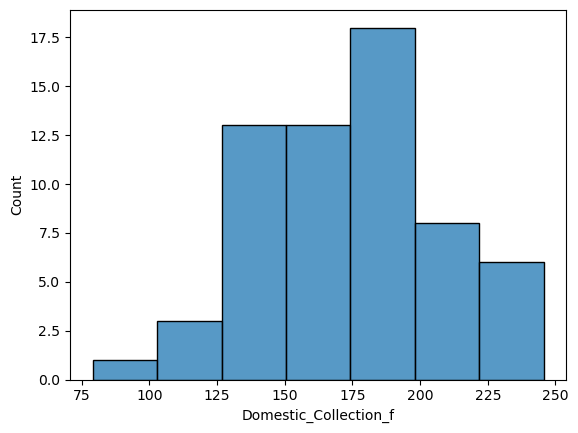

In [5]:
df["Domestic_Collection_f"] = np.log(df["Domestic_Collection"])
# plt.show()
df["Domestic_Collection_f"],parameters = stat.boxcox(df.Domestic_Collection)
# df["Domestic_Collection"] =1/df.Domestic_Collection
plt.show()
sns.histplot(data=df,x="Domestic_Collection_f")
print(df.Domestic_Collection_f.skew())

-0.013722750015032979


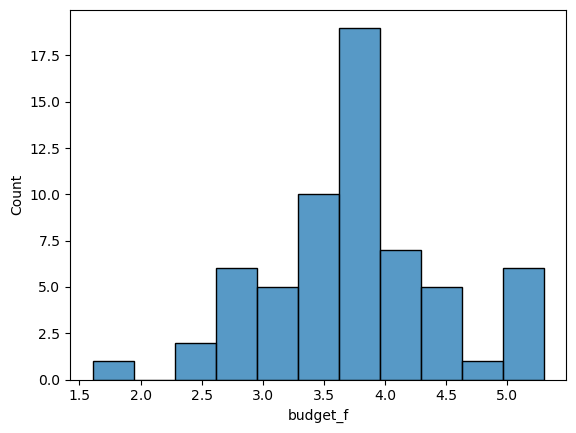

In [6]:
df["budget_f"] = np.log(df["budget"])
sns.histplot(data=df,x="budget_f")
print(df.budget_f.skew())

<Axes: xlabel='starpowr', ylabel='Count'>

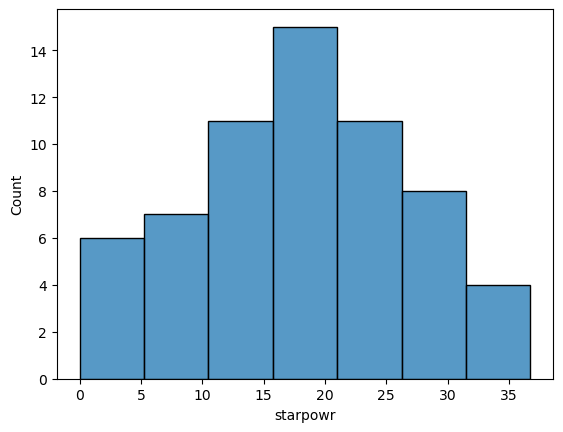

In [7]:
# df["starpowr_f"] = np.log(df["starpowr"])
sns.histplot(data=df,x="starpowr")
# print(df.starpowr.skew())

R-adjusted_r_squared: -0.8580052636335342
R-squared: -0.49249603144333065


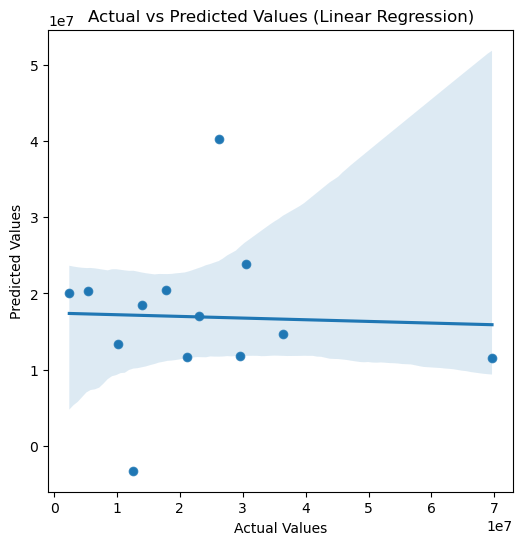

In [9]:
# Run a linear regression of box office revenues on the "traditional" variables (i.e., using all the independent variables (except the "buzz" variables). 
# If any variables were transformed, be sure to use the transformed versions of those variables. 
#What are the R² and adjusted- R² values? Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (pt)?



independent_vars = ["General_rating","parental_guidance","Strongly_parental","budget_f","starpowr","sequel","action","comedy","animated","horror","R_rated","drama"]  
dependent_var = 'Domestic_Collection'


X = df[independent_vars]
y = df[dependent_var]

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
n = len(df)  # Number of samples
p = len(independent_vars)  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print("R-adjusted_r_squared:", adjusted_r_squared)
# Print the R-squared value
print(f"R-squared: {r_squared}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()



#var with signi p values

# budget_f    0.001041
# sequel      0.008824
# action      0.055267




In [22]:
# import pandas as pd
# import statsmodels.api as sm
# # Add a constant (intercept) term to the independent variables
# X = sm.add_constant(X)

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Get the summary of the regression results
# summary = model.summary()

# # Extract t-statistics and p-values from the summary table
# t_statistics = model.tvalues
# p_values = model.pvalues

# # Filter variables significant at the 0.10 level based on p-values
# significant_at_0_10 = p_values[p_values <= 0.10]

# print("Variables significant at the 0.10 level based on p-values:")
# print(significant_at_0_10)


Variables significant at the 0.10 level based on p-values:
const                0.000334
General_rating       0.084821
Strongly_parental    0.017034
sequel               0.003089
action               0.079703
R_rated              0.002272
cant_wait            0.001780
trailer_views_f      0.001595
dtype: float64


R-adjusted_r_squared: -0.24710981062758886
R-squared: -0.18577654125246146


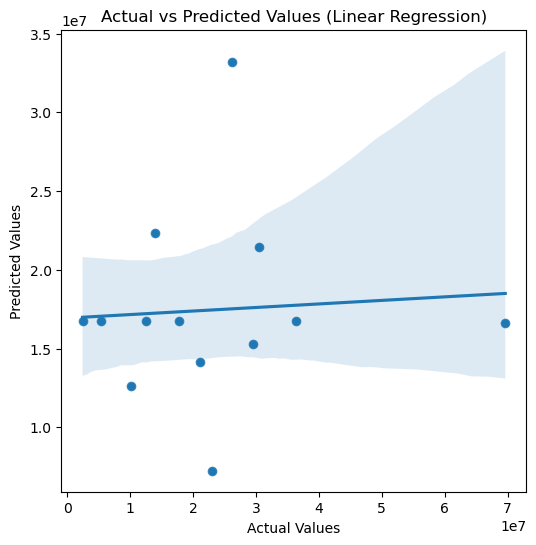

In [11]:
# Run another linear regression using only the variables that were significant (again, ignoring the "buzz" variables). 
# What are the R² and adjusted- R² values? Are all the variables still significant at the 0.10 level? 


independent_vars = ["budget_f","sequel","action"]  
dependent_var = 'Domestic_Collection'


X = df[independent_vars]
y = df[dependent_var]

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
n = len(df)  # Number of samples
p = len(independent_vars)  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print("R-adjusted_r_squared:", adjusted_r_squared)
# Print the R-squared value
print(f"R-squared: {r_squared}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()


# New vars 

# budget_f    0.000112
# sequel      0.002779


<Axes: xlabel='trailer_views_f', ylabel='Count'>

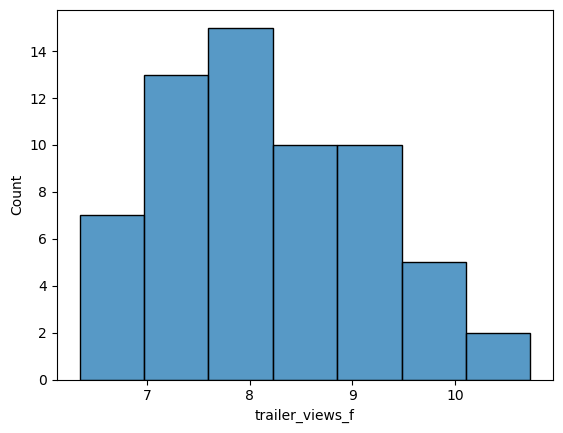

In [12]:
# Plot histograms of the four "buzz" variables. Are any of them skewed? Apply a log-transformation to all the skewed variables.

# trailer_views	cmngsoon	sum(cant_wait _dont_care)	%(cant_wait)	
df["trailer_views_f"] = np.log(df["trailer_views"])
sns.histplot(data=df,x="trailer_views_f")

<Axes: xlabel='cmngsoon_f', ylabel='Count'>

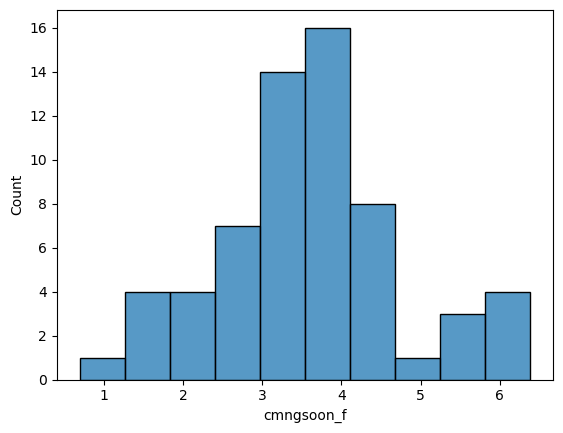

In [13]:
df["cmngsoon_f"] = np.log(df["cmngsoon"])
sns.histplot(data=df,x="cmngsoon_f")

<Axes: xlabel='sum(cant_wait _dont_care)_f', ylabel='Count'>

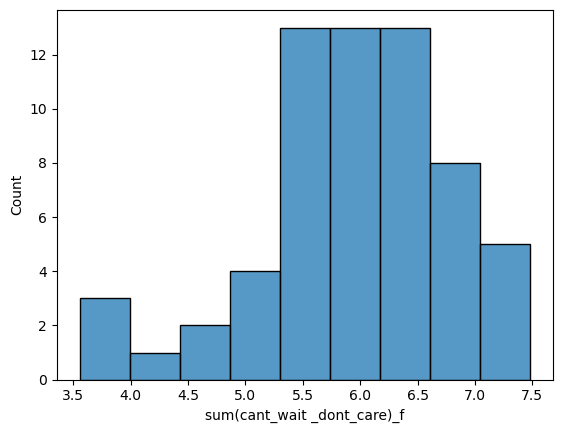

In [17]:
df["sum(cant_wait _dont_care)_f"] = np.log(df["sum(cant_wait _dont_care)"])
sns.histplot(data=df,x="sum(cant_wait _dont_care)_f")

<Axes: xlabel='cant_wait', ylabel='Count'>

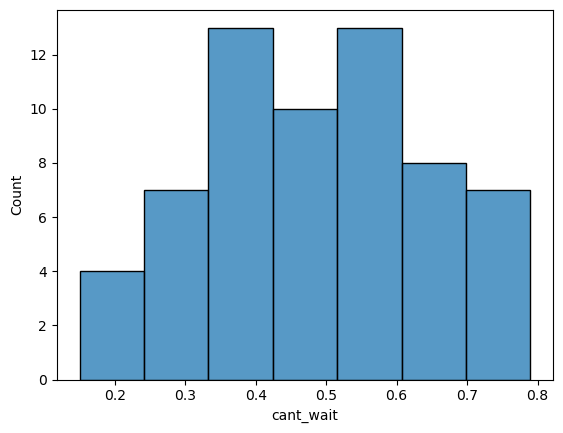

In [15]:
sns.histplot(data=df,x="cant_wait")

R-adjusted_r_squared: -0.1549841320729357
R-squared: 0.12902835942040913


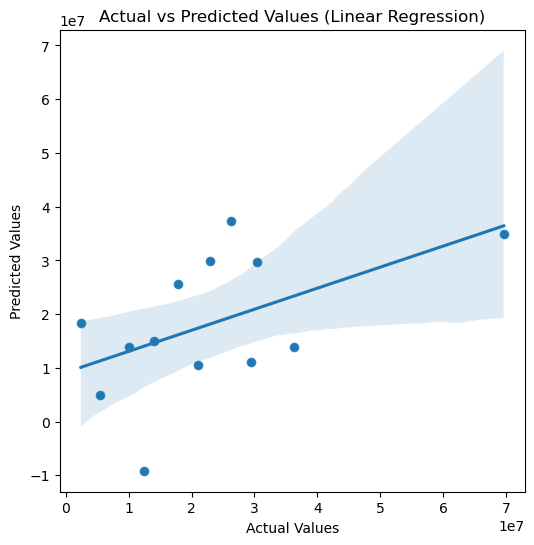

In [19]:
 
#Run a linear regression of box office revenues on all the independent variables, including the "buzz" variables (transformed as needed). What are the R² and adjusted- R² values? 
#Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (pt)? 

independent_vars = ["General_rating","parental_guidance","Strongly_parental","budget_f","starpowr","sequel","action","comedy","animated","horror","R_rated","drama","cmngsoon_f","cant_wait","trailer_views_f"]  
dependent_var = 'Domestic_Collection'


X = df[independent_vars]
y = df[dependent_var]

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
n = len(df)  # Number of samples
p = len(independent_vars)  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print("R-adjusted_r_squared:", adjusted_r_squared)
# Print the R-squared value
print(f"R-squared: {r_squared}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()



#var with signi p values

General_rating       0.048052
parental_guidance    0.088503
Strongly_parental    0.041555
sequel               0.023995
action               0.000079
comedy               0.031491
R_rated              0.006018
drama                0.089882
cant_wait            0.059175
trailer_views_f      0.021413

R-adjusted_r_squared: 0.32860055193807236
R-squared: 0.43866603522691294


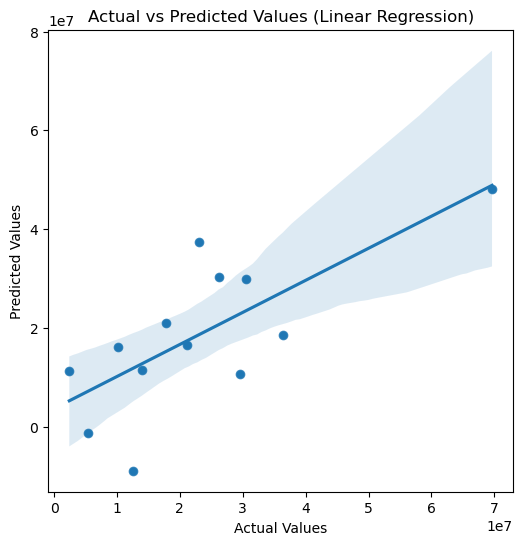

In [21]:
# Run another linear regression using only the variables that were significant. 
# What are the R² and adjusted- R² values? Are all the variables still significant at the 0.10 level? 

 
#Run a linear regression of box office revenues on all the independent variables, including the "buzz" variables (transformed as needed). What are the R² and adjusted- R² values? 
#Which variables (if any) are significant at the 0.10 level, based on the t-statistics and associated probabilities (pt)? 

independent_vars = ["General_rating","parental_guidance","Strongly_parental","sequel","action","comedy","R_rated","drama","cant_wait","trailer_views_f"]  
dependent_var = 'Domestic_Collection'


X = df[independent_vars]
y = df[dependent_var]

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared on the test set
r_squared = r2_score(y_test, y_pred)
n = len(df)  # Number of samples
p = len(independent_vars)  # Number of features
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print("R-adjusted_r_squared:", adjusted_r_squared)
# Print the R-squared value
print(f"R-squared: {r_squared}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()



#var with signi p values

# General_rating       0.084821
# Strongly_parental    0.017034
# sequel               0.003089
# action               0.079703
# R_rated              0.002272
# cant_wait            0.001780
# trailer_views_f      0.001595

In [ ]:
#Compare the models developed so far - which of these would you choose, and why? 

# WE would choose model with 
# independent_vars = ["General_rating","parental_guidance","Strongly_parental","sequel","action","comedy","R_rated","drama","cant_wait","trailer_views_f"]  
# dependent_var = 'Domestic_Collection'
# bec of best r2 values seen so far although it is a week fit.
